In [45]:
import os
import pandas as pd
import numpy as np
import tweepy
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv

In [2]:

# load the .env file variables
load_dotenv()

# your app code here
consumer_key = os.environ.get('CONSUMER_KEY')
consumer_secret = os.environ.get('CONSUMER_SECRET')
bearer_token = os.environ.get('BEARER_TOKEN')

In [3]:
# Creamos cliente
### completar con datos
client = tweepy.Client( bearer_token=bearer_token,
consumer_key=consumer_key,
consumer_secret=consumer_secret,
return_type = requests.Response,
wait_on_rate_limit=True)


In [4]:
# definiendo query para twiter
query = '#100daysofcode (pandas OR python) -is:retweet'


In [5]:
tweets = client.search_recent_tweets(query=query,
tweet_fields=['author_id','created_at','lang'],
max_results=100)

In [6]:
# Save as dictionary
tweets_dict = tweets.json()
tweets_dict.keys()

dict_keys(['data', 'meta'])

In [ ]:
# Extract data
tweets_data = tweets_dict['data']

In [7]:
# Transform to pandas DF
df = pd.json_normalize(tweets_data)

In [11]:
df.head()

,author_id,id,text,lang,created_at
0,741220945,1537975553759641600,Day 6⃣1⃣: #100DaysOfCode \nDay 1⃣7⃣ : #66DaysO...,en,2022-06-18T01:48:40.000Z
1,1529052664251678721,1537975142059343873,A complete overview on #python lists!\nLet me ...,en,2022-06-18T01:47:02.000Z
2,1405576080388505604,1537974185540014083,Dm for assistance in any paperwork. I got it c...,en,2022-06-18T01:43:14.000Z
3,1390551500133261316,1537973640137846784,What's your Tech Stack?\n\n#100DaysOfCode #Sof...,en,2022-06-18T01:41:04.000Z
4,1243665419501744133,1537973426207346688,"""If you build the guts to do something, anythi...",en,2022-06-18T01:40:13.000Z


In [12]:
df.to_csv('coding-tweets.csv')

### Search for the words

In [13]:
import re

In [33]:
def word_in_text(word,tweet):
    t=tweet
    t=t.lower()
    w=re.compile(word)
    if w.search(t) is not None :
        return('Si')
    else :
            return('No')

In [34]:
#testing the function
word_in_text('python','the best lenguage is Python')

'Si'

In [43]:
n_py=0
n_pd=0

for lab,row in df.iterrows():
    if word_in_text('python',row['text']) == 'Si' :
        n_py+=1
    if word_in_text('pandas',row['text']) == 'Si' :
        n_pd+=1
    
print (f'Python {n_py} // Pandas {n_pd}')

Python 99 // Pandas 1


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


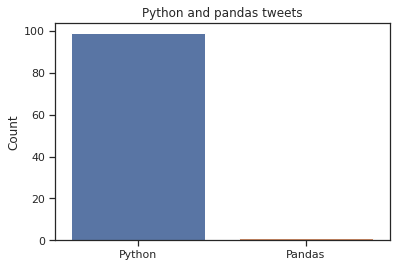

In [54]:
sns.set_theme(style="ticks", color_codes=True)

cd=['Python','Pandas']

ax = sns.barplot(cd,[n_py,n_pd])
ax.set(ylabel='Count',title='Python and pandas tweets')
plt.show()